<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

Can we predict the prices of home sales in the Ames, Iowa market based on certain features of the home?  Which features are most important (have the highest correlation) in predicting the price and which features impact the value (higher coefficients in the linear model) the most?

Additionally, can a linear regression model score with high accuracy ($R^2$ greater than 0.5)?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

To-Do: Background about Ames

### Datasets
To analyze this problem, we are using housing data from Ames, Iowa.

For modeling, I am using the train.csv file in the github repo under datasets/.

Then I will run my model to predict the prices in the test.csv file and submit my prices by ID

### Outside Research

To-Do: Additional Research for Housing stuff

### Data cleaning functions
    
As needed

You will use these functions later on in the project!

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [1]:
# Imports:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import random as random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error

## Data Import

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [2]:
#initialize raw dataframe that i can refer back to if needed
ames = pd.read_csv('./datasets/train.csv')
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


#### Features I'd want to look into further.

I spent a good couple hours just trying to understand all the features, how they're categorized, and some additional real-estate jargon.  This basic list is unfortunately the culmination of those few hours.  There's not too much modeling/cleaning work that got done today, but now I know where to focus my efforts.
Cross-referencing from data-dictionary:
http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

* MS Zoning - zoning classification (low density vs industrial etc): useful, but need to dummify
* Lot Area - continuous, square footage
* Utilities - ordinal, need to dummify
* Neighborhood - useful, but is it already correlated to something else?
* Bldg Type - type of family dwelling (single-fam vs duplex vs townhouse etc)
* House style - style (num of stories, split foyer)
* Overall Qual - ordinal, from very poor to very excellent
* Overall Cond - ordinal, from very poor to very excellent
* Year Remod/Add - discrete, year of latest construction (original date if no new construction)
* Exter Qual - ordinal, from poor to excellent
* Exter Cond - ordinal, from poor to excellent
* Bsmt Qual - height, from poor to excellent (NA)
* Bsmt Cond - general condition, from poor to excellent (NA)
* Bsmt Exposure - walkout exposure, from none to good
* BsmtFin Type1 - quality of finished living quarters, from unf to good quality
* BsmtFin SF 1 - sq ft of finished basement
* Total Bsmt SF - total sq ft of basement
* HeatingQC - quality of heating, from poor to excellent
* Central Air - binary, yes or no
* Gr Liv Area - above ground living area square foot (seems to be mentioned in the documentation a lot)
* Bsmt Full Bath/Bsmt Half Bath/Full Bath/Half Bath - can all be combined into 'Baths'?
* Bedroom - # of discrete rooms above grade
* Kitchen - # of discrete kitchens above grade
* KitchenQual - quality of kitchen, from poor to excellent
* TotRmsAbvGrd - total # of livable rooms
* Functional - home functionality, from salvage only to typical
* Garage Finish - interior finish quality, from none to finished
* Garage Cars - num of cars that fit
* Garage Area - size in sq ft
* Garage Qual - quality, from poor to excellent (NA)
* Garage Cond - condition, from poor to excellent (NA)
* Wood Deck SF/Open Porch SF/Ecnlosed Porch/3-Ssn Porch/Screen Porch - can all be combined into 'porch/deck sq ft'
* Misc Val - value of additional assets
* Mo Sold - month of sale
* Yr sold - year of sale, but hard to use as a predictor since you can't repeat a year
* Sale Condition - normal vs abnormal/adjland/family/partial - would be good to investigate further

#### Initial Data Cleaning

In [3]:
#apply snake_case to all columns
ames.columns = [col.lower().replace(' ', '_') for col in ames.columns]
ames.head(2)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


#### EDA and Cleaning along the Way

In [4]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [5]:
#this info is in the data documentation, it will probably be helpful later when I need to do OHE vs OE

nominal = ['ms_zoning', 'street', 'alley', 'land_contour', 'lot_config', 'neighborhood', 'condition_1', 'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'foundation', 'heating', 'central_air', 'garage_type', 'misc_feature', 'sale_type']
ordinal = ['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu', 'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']
discrete = ['ms_subclass', 'year_built', 'year_remod/add', 'overall_qual', 'overall_cond', 'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars', 'mo_sold', 'yr_sold']
continuous = ['lot_frontage', 'lot_area', 'mas_vnr_area', 'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'garage_area', 'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch', 'pool_area', 'misc_val']

categorical = ames.select_dtypes(include='object').columns
numeric = ames._get_numeric_data().columns
print(len(categorical),len(numeric))
#adds up to 81

42 39


In [6]:
#feedback_text = []
nul_col = []
for col in ames.columns:
    if ames[col].isnull().sum() > 0:
        print('\n', col, ames[col].isnull().sum())
        print(ames[col].unique())
        nul_col.append(col)
        #feedback_text.append(input())  #used this code the first time I ran the cell, but saved output in markdown below


 lot_frontage 330
[ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]

 alley 1911
[nan 'Pave' 'Grvl']

 mas_vnr_type 22
['BrkFace' 'None' nan 'Stone' 'BrkCmn']

 mas_vnr_area 22
[2.890e+02 1.320e+02 0.000e+00 8.200e+01 1.800e+02 1.920e+02 2.320e+02
 4.560e+02 1.480e+02       nan 3.000e+00 3.360e+02 4.800e+02 3.200e+02
 1.040e+02 3.350e+02 4.000e+01 1.100e+02 1.060e+02 5.130e+02 1.840e+02
 5.220e+02 1.430e+02 3.480e+02 1.170e+02 5.100e+02 1.4

In [7]:
def eda_histograms(df, columns):
    nrows = int(np.ceil(len(columns)/4)) 
    ncols = 4
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols,figsize=(14, nrows*2.5)) 
    ax = ax.ravel() 
    for i, column in enumerate(columns): 
        sns.histplot(data=df, x=df[column], kde=False, ax=ax[i], fill=False)
        ax[i].set_title(column,fontsize=14)
        ax[i].set_xlabel('')
        ax[i].tick_params(labelsize=10)
    plt.tight_layout(h_pad=-0.4, w_pad=-0.4)
    
    for i in range(nrows * ncols - len(columns)):
        ax[-i-1].set_visible(False) # Start from -1
        
    plt.suptitle('Histograms of Features with Nulls', fontsize=20, y=1.015)

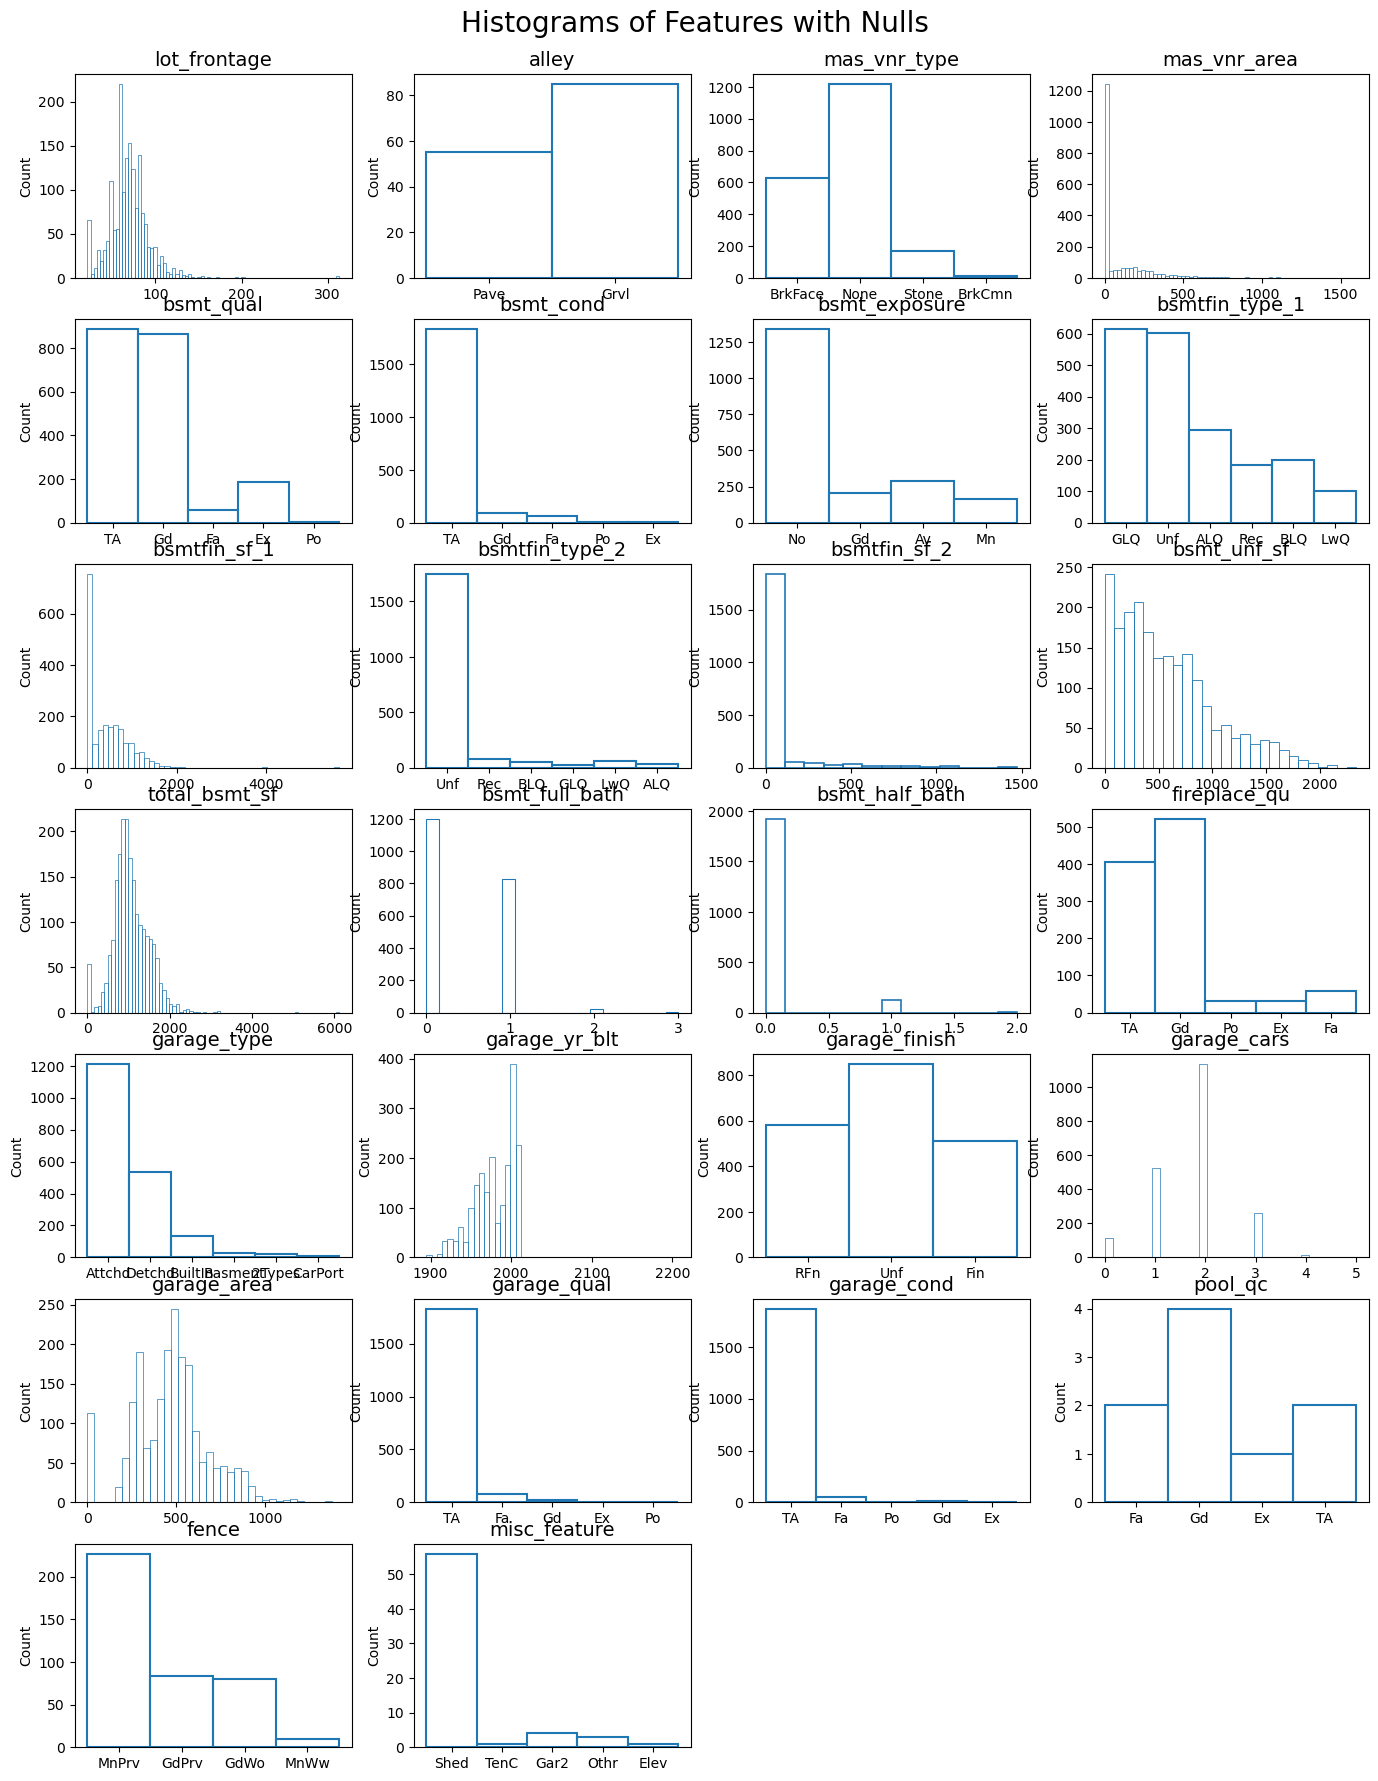

In [8]:
eda_histograms(ames, nul_col)

#### My thoughts on each column with null values

```
for (col,feedback) in zip(ames.columns[ames.isna().any()].tolist(),feedback_text):
    print(col + ' (' + str(ames[col].isnull().sum()) + '): ' + feedback)
```

* lot_frontage (330):  area in front of house, 15% nulls, they could be 0 or median 
* alley (1911):  type of alley, nulls could be 'No Alley'
* mas_vnr_type (22):  type of mas vnr, nulls could also be 'None'
* mas_vnr_area (22):  surface area of mas vnr, nulls could be 0
* bsmt_qual (55):  quality of bsmt height, nulls could be 'no basement'
* bsmt_cond (55):  overall quality of bsmt, nulls could be 'no basement'
* bsmt_exposure (58):  exposure quality, nulls could be 'no exposure' or 'no basement'
* bsmtfin_type_1 (55):  first type of finish, nulls could be 'no basement'
* bsmtfin_sf_1 (1):  area of first type of basement, nulls could be 0
* bsmtfin_type_2 (56):  second type of finish, nulls could be 'no basement'
* bsmtfin_sf_2 (1):  area of second type of basement, nulls could be 0
* bsmt_unf_sf (1):  area of unfinished basement, nulls could be 0
* total_bsmt_sf (1):  area of total basement, nulls could be 0
* bsmt_full_bath (2):  number of full bsmt baths, nulls could be 0
* bsmt_half_bath (2):  number of bsmt half baths, nulls could be 0
* fireplace_qu (1000):  quality of fireplace, nulls could be 'no fireplace'
* garage_type (113):  type of garage, nulls could be 'no garage'
* garage_yr_blt (114):  age of garage, nulls could be 'no garage' or median
* garage_finish (114):  level of garage finish, nulls could be 'no garage'
* garage_cars (1):  size in #cars, nulls could be 0
* garage_area (1):  garage size in sq ft, nulls could be 0
* garage_qual (114):  quality of garage, nulls could be 'no garage'
* garage_cond (114):  condition of garage, nulls could be 'no garage'
* pool_qc (2042):  quality of pool, nulls could be 'no pool'
* fence (1651):  privacy level of fence, nulls could be 'no fence'
* misc_feature (1986):  type of misc feature, nulls could no 'no misc feat'

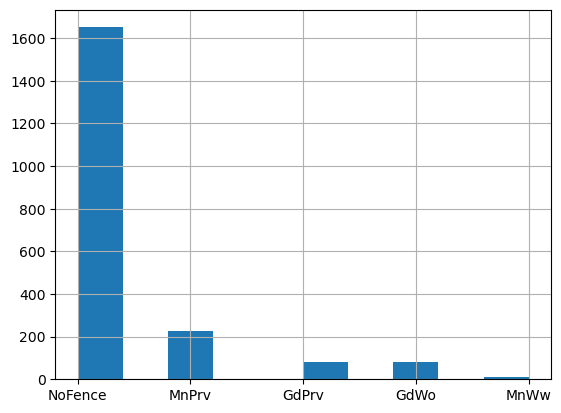

In [9]:
#i'm ok with dropping the columns with more than 25% nulls (min 512 nulls):
#misc feature, fence, pool qc, fireplace qu, alley
#the nulls could be imputed with 'no [feature]', 
#but there won't be a normal distr of the values in these columns
#so it'll bias the model in some way

#for example:
ames['fence'].fillna('NoFence').hist();

In [10]:
#don't forget this step!
#threshold for non-nulls is 75% of all observations
ames.dropna(axis=1,thresh=(2049*0.75), inplace=True)
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,...,44,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,74,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,52,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,59,0,0,0,0,0,3,2010,WD,138500


### Data Dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

**My Data Dictionary**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|2017_avg_income|*float*|all_state_info.csv|Median household income, by state, in 2017 (in USD)|
|2018_avg_income|*float*|all_state_info.csv|Median household income, by state, in 2018 (in USD)|
|2019_avg_income|*float*|all_state_info.csv|Median household income, by state, in 2019 (in USD)|

## Exploratory Data Analysis & Visualization

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement.
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

def scatter_plot(df, column, ax):
    '''fn takes in a df, a column name (string), and a defined plt object and returns a scatter plot'''
    #add a scatter plot of the observed values against the states
    
    #random colors each time I run the function
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    ax.scatter(df.index, df[column],s = 10,color=color,label=column)
    ax.set_xlabel('States');

def bar_plot(df, column, ax):
    '''fn takes in a df, a column name (string), and a defined plt object and returns a bar plot'''
    #add a bar plot of the average value of a category against the states
    
    #random colors
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    
    ax.bar(x=df.index, height=df[column], label=column, color=color, alpha=0.7)
    ax.set_xlabel('States');

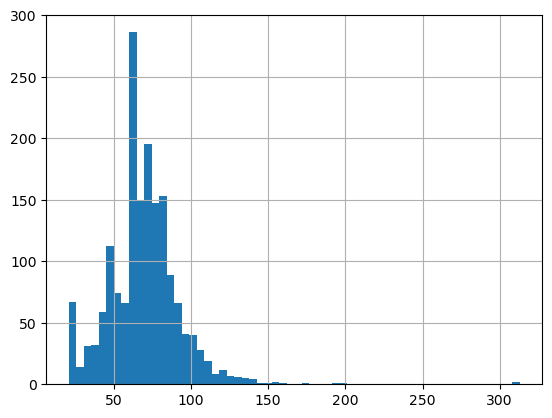

In [11]:
#histograms
ames['lot_frontage'].hist(bins = 60);

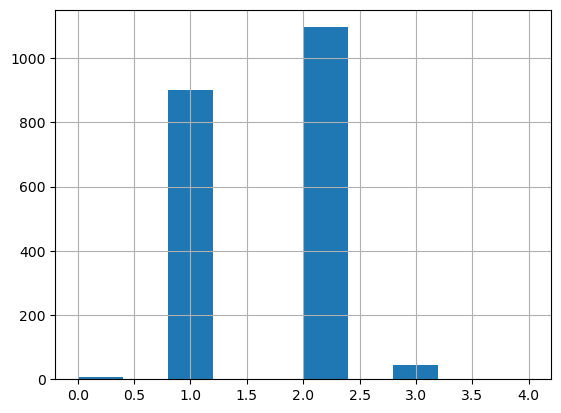

In [12]:
ames.full_bath.hist();

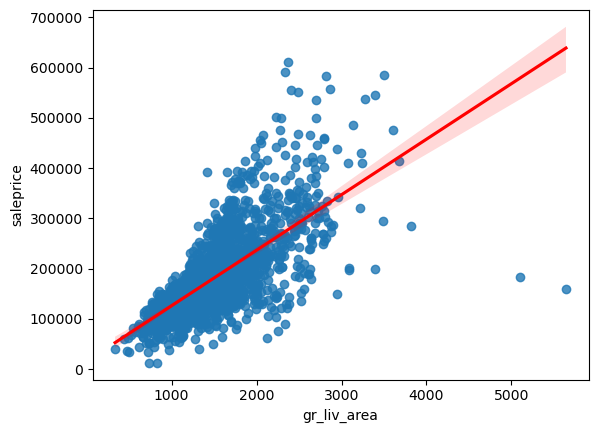

In [13]:
#sns.scatterplot(x=ames['bedroom_abvgr'], y=y);
sns.regplot(y=ames['saleprice'], x=ames['gr_liv_area'], fit_reg=True, line_kws={"color": "red"});

In [14]:
#there are a couple outliers here (that were also mentioned in the data documentation page)
#I will remove these before proceeding

bad_rows = ames[ames['gr_liv_area']>4000].index
ames.drop(labels=bad_rows,inplace=True)
ames.shape

(2049, 76)

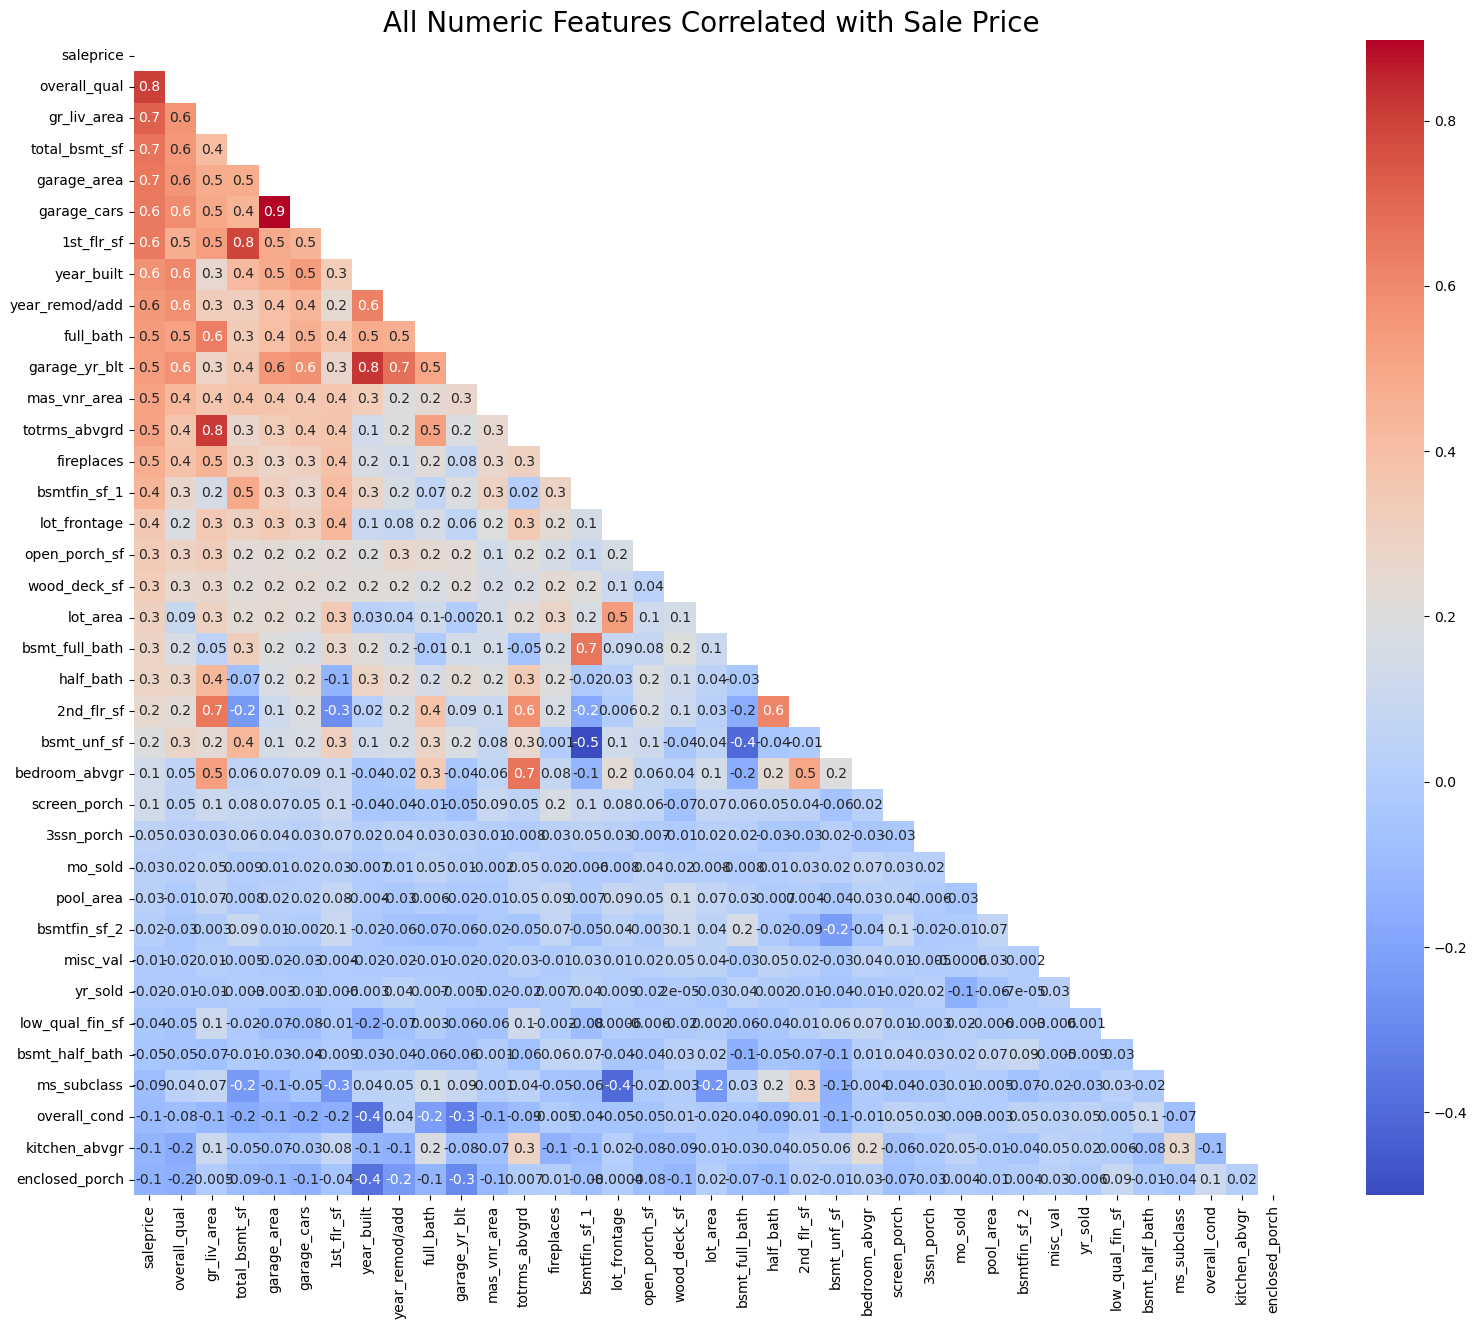

In [15]:
# Create mask for our correlated features
top_corr = ames.drop(columns=['id','pid']).corr()['saleprice'].sort_values(ascending=False).index

#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(ames[top_corr].corr(), dtype=bool))
ax = sns.heatmap(ames[top_corr].corr(), cmap='coolwarm', mask=mask, square=True, annot=True, fmt='.1g')
plt.title('All Numeric Features Correlated with Sale Price', fontsize=20);

High correlation (0.5 or higher): fireplaces, totrms_abvgrd, mas_vnr_area, garage_yr_blt, full_bath, year_remod/add, year_built, 1st_flr_sf, garage_cars, garage_area, total_bsmt_sf, gr_liv_area, overall_qual

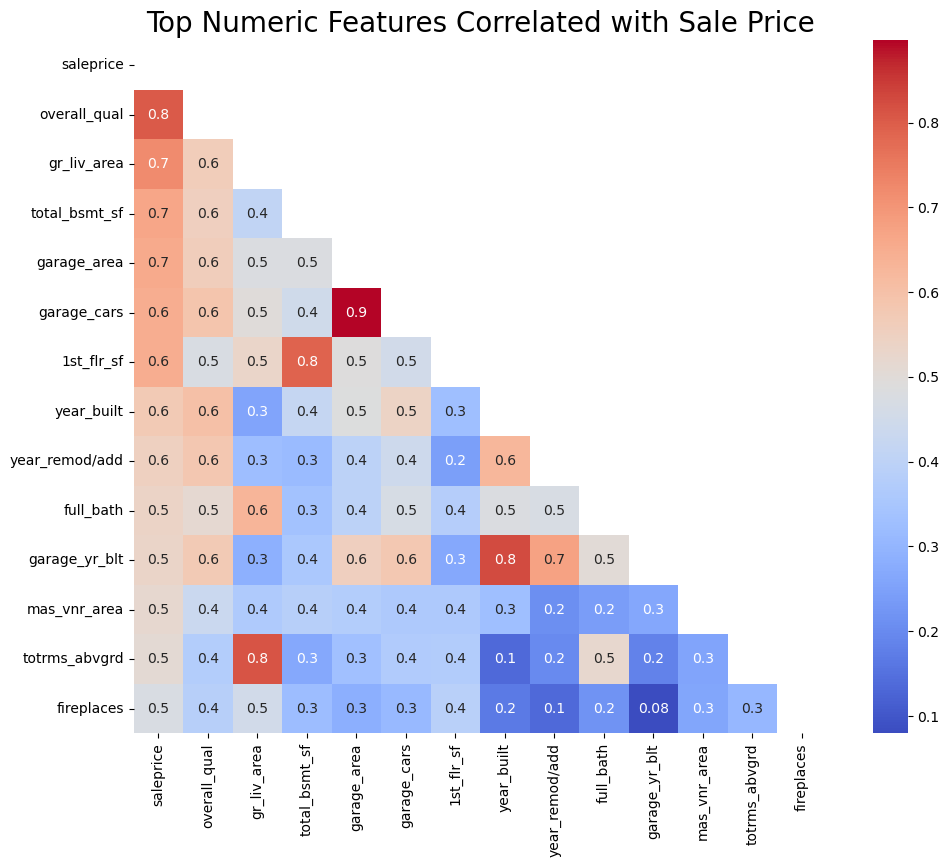

In [16]:
#only those with 0.5 or higher corr
# Create mask for our top positively correlated features
top_corr = ames.drop(columns=['id','pid']).corr()['saleprice'].sort_values(ascending=False)[:14].index

#Plot heatmap of top twenty positively correlated features.
plt.figure(figsize=(12,9))
mask = np.triu(np.ones_like(ames[top_corr].corr(), dtype=bool))
ax = sns.heatmap(ames[top_corr].corr(), cmap='coolwarm', mask=mask, square=True, annot=True, fmt='.1g')
plt.title('Top Numeric Features Correlated with Sale Price', fontsize=20);

#### Split DF into X/y and train/test

Even though it feels early, I need to do imputation/OHE on split data

In [17]:
#split dataframe into X features and y target
y = ames['saleprice']
ames_id = ames['id']
X = ames.drop(columns = ['id', 'pid', 'saleprice'])

print(X.shape, y.shape)
X.head(1)

(2049, 73) (2049,)


,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
0,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,...,0,44,0,0,0,0,0,3,2010,WD


In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 199)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1639, 73), (410, 73), (1639,), (410,))

#### Imputation

In [23]:
# create simpleImputer function and fill all null values in a column with the best strategy for that column
# fill any numerics with 0 (these are SF or #items, and if value is null, it is probably 0)
# fill any categoricals with 'None' (as a str) (these are types or qualities. if null, probably don't exist)

col_fill_0 = ['lot_frontage','mas_vnr_area','bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf',
              'total_bsmt_sf','bsmt_full_bath','bsmt_half_bath','garage_cars','garage_area','garage_yr_blt']
col_fill_None = ['mas_vnr_type','bsmt_qual','bsmt_cond','bsmt_exposure','bsmtfin_type_1','bsmtfin_type_2',
                 'garage_type','garage_finish','garage_qual','garage_cond']

ctx_si = ColumnTransformer(
[('si_0', SimpleImputer(strategy='constant', fill_value=0), col_fill_0),
 ('si_None', SimpleImputer(strategy='constant', fill_value='None'), col_fill_None)],
    remainder='passthrough',verbose_feature_names_out=False)

In [24]:
#fit and transform the train set
X_train_imp = ctx_si.fit_transform(X_train)

#only transform the test set
X_val_imp = ctx_si.transform(X_val)

#create DFs
X_train_imp = pd.DataFrame(X_train_imp, columns = ctx_si.get_feature_names_out())
X_val_imp = pd.DataFrame(X_val_imp, columns = ctx_si.get_feature_names_out())

In [25]:
X_train_imp.head(2)

,lot_frontage,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath,garage_cars,garage_area,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,sale_type
0,71.0,338.0,1513.0,0.0,125.0,1638.0,1.0,0.0,3.0,800.0,...,192,44,0,0,0,0,0,4,2008,New
1,0.0,0.0,648.0,0.0,0.0,648.0,1.0,1.0,1.0,364.0,...,88,0,0,0,0,0,0,5,2006,WD


#### Feature Engineering

Here I am combining columns that can be added up to an equivalent feature.  I'm also checking some values to verify if that's already done (like bsmt_sf) so I can drop extra columns.

In [26]:
#checking if total_bsmt_sf is the sum of the previous 3 columns in every observation
tot_bsmt_binary = (X.total_bsmt_sf == (X.bsmtfin_sf_1+X.bsmtfin_sf_2+X.bsmt_unf_sf))
print([(i,val) for i, val in enumerate(tot_bsmt_binary) if not val])
#only one observation doesn't add up exactly
X.loc[1326,['bsmtfin_sf_1','bsmtfin_sf_2','bsmt_unf_sf','total_bsmt_sf']]
#this one does also seem to add up exactly, so i am content dropping the other columns

[(1326, False)]


bsmtfin_sf_1       0.0
bsmtfin_sf_2       0.0
bsmt_unf_sf      672.0
total_bsmt_sf    672.0
Name: 1326, dtype: object

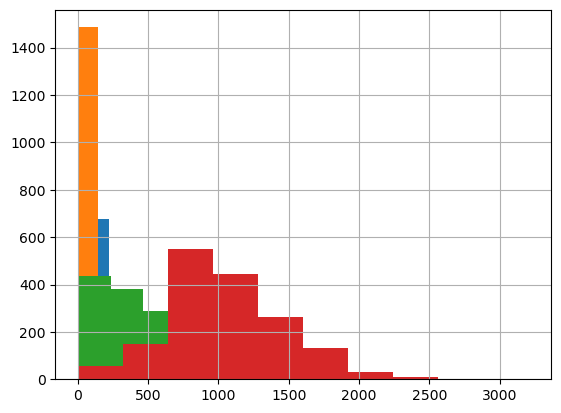

In [27]:
X_train_imp.bsmtfin_sf_1.hist()
X_train_imp.bsmtfin_sf_2.hist()
X_train_imp.bsmt_unf_sf.hist()
X_train_imp.total_bsmt_sf.hist();

In [28]:
#checking if gr_liv_area is the sum of the previous 3 columns in every observation
gr_la_binary = (X.gr_liv_area == (X.low_qual_fin_sf+X['1st_flr_sf']+X['2nd_flr_sf']))
print([(i,val) for i, val in enumerate(gr_la_binary) if not val])
#0 observations don't add up exactly
X.loc[16,['low_qual_fin_sf','1st_flr_sf','2nd_flr_sf','gr_liv_area']]
#verified a few rows to make sure my code was right, it appears to be

[]


low_qual_fin_sf       0
1st_flr_sf          624
2nd_flr_sf          720
gr_liv_area        1344
Name: 16, dtype: object

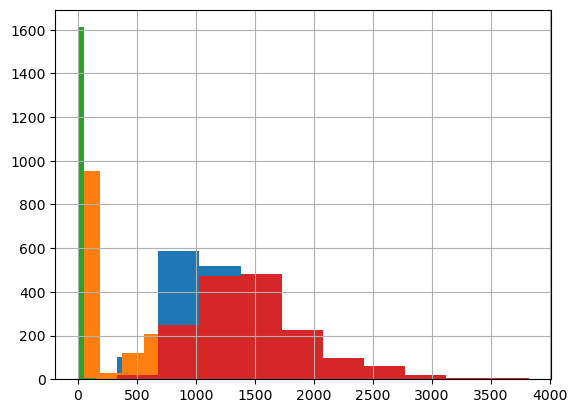

In [29]:
X_train_imp['1st_flr_sf'].hist()
X_train_imp['2nd_flr_sf'].hist()
X_train_imp.low_qual_fin_sf.hist()
X_train_imp.gr_liv_area.hist();

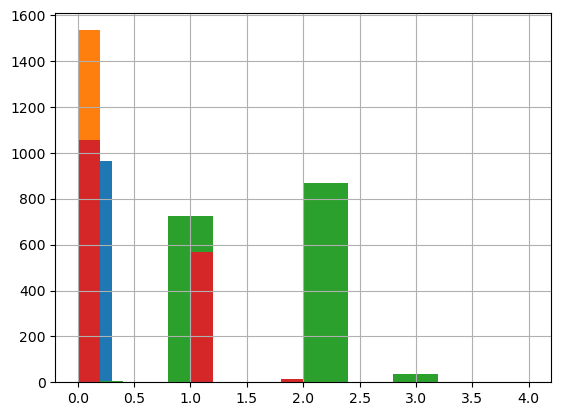

In [30]:
X_train_imp.bsmt_full_bath.hist()
X_train_imp.bsmt_half_bath.hist()
X_train_imp.full_bath.hist()
X_train_imp.half_bath.hist();

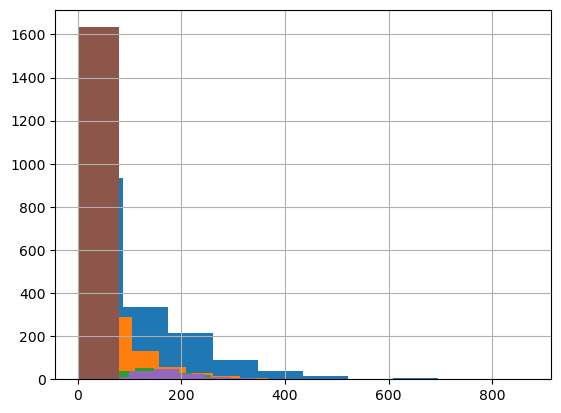

In [31]:
X_train_imp.wood_deck_sf.hist()
X_train_imp.open_porch_sf.hist()
X_train_imp.enclosed_porch.hist()
X_train_imp['3ssn_porch'].hist()
X_train_imp.screen_porch.hist();
X_train.pool_area.hist();

In [32]:
X_train_imp[['wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch','screen_porch','pool_area']].describe()

,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area
count,1639,1639,1639,1639,1639,1639
unique,286,204,132,18,84,7
top,0,0,0,0,0,0
freq,857,739,1388,1619,1494,1633


In [33]:
#combine similar columns that can be added up

def feature_combining(df):
    '''this feature takes in the df (train/val/test) and performs the same FE steps'''

    insert_spot = df.columns.get_loc("wood_deck_sf")
    df.insert(insert_spot, "outdoor_fin_sf", 0, True)
    df.outdoor_fin_sf = (df.wood_deck_sf+df.open_porch_sf+df.enclosed_porch
                         +df['3ssn_porch']+df.screen_porch+df.pool_area)

    insert_spot = df.columns.get_loc('full_bath')
    df.insert(insert_spot, "baths", 0, True)
    df.baths = df.full_bath+(df.half_bath/2)
    
    insert_spot = df.columns.get_loc('bsmt_full_bath')
    df.insert(insert_spot, "bsmt_baths", 0, True)
    df.baths = df.bsmt_full_bath+(df.bsmt_half_bath/2)
    
    #drop the columns which contributed to our combined features
    df.drop(columns=['wood_deck_sf','open_porch_sf','enclosed_porch','3ssn_porch', 'screen_porch', 'pool_area', 
                     'full_bath','half_bath', 'bsmt_full_bath', 'bsmt_half_bath'],axis=1,inplace=True)
    
    #also drop the columns that we verified are individual components of a sum
    df.drop(columns=['bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 
                     '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf'], axis=1, inplace=True)
    
    return df

In [34]:
X_train_fe = feature_combining(X_train_imp)
X_val_fe = feature_combining(X_val_imp)

In [35]:
X_train_fe.head(2)

,lot_frontage,mas_vnr_area,total_bsmt_sf,bsmt_baths,garage_cars,garage_area,garage_yr_blt,mas_vnr_type,bsmt_qual,bsmt_cond,...,kitchen_qual,totrms_abvgrd,functional,fireplaces,paved_drive,outdoor_fin_sf,misc_val,mo_sold,yr_sold,sale_type
0,71.0,338.0,1638.0,0,3.0,800.0,2008.0,Stone,Gd,TA,...,Gd,7,Typ,1,Y,236,0,4,2008,New
1,0.0,0.0,648.0,0,1.0,364.0,1965.0,None,TA,Gd,...,TA,3,Typ,0,Y,88,0,5,2006,WD


In [36]:
# ames.drop(columns=['overall_qual','overall_cond','low_qual_fin_sf','wood_deck_sf',
#                       'open_porch_sf','enclosed_porch','3ssn_porch','screen_porch',
#                       'pool_area','yr_sold','full_bath','half_bath'],axis=1,inplace=True)
#ames.head(2)

#### Ordinal Encoding

In [37]:
#ordinal list was defined at the top of the notebook
ordinal = [each for each in ordinal if (each in X_train_fe.columns)]

ord_dict = {each: X_train_fe[each].unique().tolist() for each in ordinal}
ord_dict

{'lot_shape': ['IR1', 'Reg', 'IR2', 'IR3'],
 'utilities': ['AllPub', 'NoSewr'],
 'land_slope': ['Gtl', 'Mod', 'Sev'],
 'exter_qual': ['Gd', 'TA', 'Fa', 'Ex'],
 'exter_cond': ['TA', 'Gd', 'Fa', 'Ex', 'Po'],
 'bsmt_qual': ['Gd', 'TA', 'Ex', 'None', 'Fa', 'Po'],
 'bsmt_cond': ['TA', 'Gd', 'Fa', 'None', 'Ex', 'Po'],
 'bsmt_exposure': ['Gd', 'Av', 'No', 'Mn', 'None'],
 'bsmtfin_type_1': ['GLQ', 'ALQ', 'LwQ', 'Unf', 'Rec', 'BLQ', 'None'],
 'bsmtfin_type_2': ['Unf', 'Rec', 'LwQ', 'BLQ', 'None', 'GLQ', 'ALQ'],
 'heating_qc': ['Ex', 'TA', 'Gd', 'Fa', 'Po'],
 'electrical': ['SBrkr', 'FuseA', 'FuseP', 'FuseF', 'Mix'],
 'kitchen_qual': ['Gd', 'TA', 'Ex', 'Fa'],
 'functional': ['Typ', 'Maj2', 'Mod', 'Min1', 'Maj1', 'Min2', 'Sal', 'Sev'],
 'garage_finish': ['RFn', 'Unf', 'Fin', 'None'],
 'garage_qual': ['TA', 'None', 'Fa', 'Gd', 'Ex', 'Po'],
 'garage_cond': ['TA', 'None', 'Fa', 'Gd', 'Po', 'Ex'],
 'paved_drive': ['Y', 'N', 'P']}

**Ordinal Encoding Methodology**

I thought about how to encode the ordinal values for a while.  At first I was thinking it should just be 0 (lowest/worst) to N (highest/best) according to the values mentioned in the data dictionary.  However, after reading a bit more about encoding and ordinal values online, this is the logic I arrived at:

We often evaluate things in terms of qualitative averages.  It's not bad, and it's not excellent, it's what I expected.  In terms of housing, I think many people are looking for average qualities across the board.  Ideally they want the best quality, but that comes at a premium.  And they're willing to take something in worse quality, but only at a discount because it would require monetary investment to improve that feature.  So in terms of a home price, I believe a normal distribution of prices aligns with a normal distribution of home quality.  

So average quality is mapped to 0, anything above that is a positive value, and anything below that is a negative value.  

For features where the quality falls in a range OR the feature does not exist (ie basement/garage), I considered it this way: A basement is an extra feature.  Holding all other features constant, the 'No basement' option is 'normal' and maps to 0, and having an average basement is an additional asset, so it is a positive value.  Having an excellent quality basement is even more positive.  On the other hand, having a fair or poor quality basement becomes a liability because it requires monetary and time investment from the owner, so those are negative values.

For the features that had unique categories (not just {'Ex', 'Gd', 'TA', 'Fa', 'Po'}), I manually mapped those by reading what each label meant in the data dictionary.

For the most part, these mappings are one-unit changes, because I don't have any quantitative way of saying how much better 'excellent' is compared to 'good'.  I did make adjustments to the 'functional' feature, because of the language used in the dictionary.

*Note on OrdinalEncoder from SKLearn*

I researched and considered using the OrdinalEncoder() from sklearn, but by default it encodes the values in alphabetical order. You can add a dictionary map, but I needed so many different dictionaries for different features that it eventually made more sense to use the manual process below.

In [38]:
for key, value in ord_dict.items():
    #if it has a 'None' option, the none is set to 0, and average and above is positive, fair and below is negative
    if 'TA' in value and 'None' in value:
        ord_dict[key] = {'Ex':3, 'Gd':2, 'TA':1, 'None':0, 'Fa':-1, 'Po':-2}
    
    #if it doesn't have a 'None' option, the average is set to 0, better than avg is +, and below avg is -
    elif 'TA' in value:
        ord_dict[key] = {'Ex':2, 'Gd':1, 'TA':0, 'Fa':-1, 'Po':-2}
    
    #mapped this using the same logic as the first line: No basement is 0, 
    #a low-quality/unfinished is (-) because it requires $$
    #a basic rec room and anything better is (+)
    elif 'GLQ' in value:
        ord_dict[key] = {'GLQ':4, 'ALQ':3, 'BLQ':2, 'Rec':1, 'None':0, 'LwQ':-1, 'Unf':-2}

#mapped the rest one by one

#a 'regular' lot is normal, and anything worse is a deduction
ord_dict['lot_shape'] = {'Reg':0, 'IR1':-1, 'IR2':-2, 'IR3':-3}

#all utilities is normal, anything less than that is a deduction
ord_dict['utilities'] = {'AllPub':0, 'NoSewr':-1, 'NoSeWa':-2, 'ELO':-3}

#gentle slope is normal, anything worse than that is a deduction
ord_dict['land_slope'] = {'Gtl':0, 'Mod':-1, 'Sev':-2}

#exposure ranges from 'No' (negative) to 'Gd' (positive). 
#'None' correlates to 'no basement', which is conceivably better than 'basement with no exposure'
ord_dict['bsmt_exposure'] = {'Gd':3, 'Av':2, 'Mn':1, 'None':0, 'No':-1}

#average fuse is normal, standard breaker is (+), anything worse is (-)
ord_dict['electrical'] = {'SBrkr':1, 'FuseA':0, 'FuseF':-1, 'FuseP':-2, 'Mix':-3}

#typical is normal, everything else i evaluated in terms of the intensity of the vocab
#1 point deductions for min1/min2/mod each. 
#major is the next step so add an additional deduction for each
#severe is significantly worse, so add an additional deduction
#similarly for salvage, significantly worse than severe
ord_dict['functional'] = {'Typ':0, 'Min1':-1, 'Min2':-2, 'Mod':-3, 'Maj1':-5, 'Maj2':-6, 'Sev':-8, 'Sal':-10}

#'None' correlated to 'no garage' and is normal, some amount of finish is (+) but unfinished is an investment (-)
ord_dict['garage_finish'] = {'Fin':2, 'RFn':1, 'None':0, 'Unf':-1}

#paved (Y) is normal, anything worse is a deduction
ord_dict['paved_drive'] = {'Y':0, 'P':-1, 'N':-2}

#return final mapping dictionary
ord_dict

{'lot_shape': {'Reg': 0, 'IR1': -1, 'IR2': -2, 'IR3': -3},
 'utilities': {'AllPub': 0, 'NoSewr': -1, 'NoSeWa': -2, 'ELO': -3},
 'land_slope': {'Gtl': 0, 'Mod': -1, 'Sev': -2},
 'exter_qual': {'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po': -2},
 'exter_cond': {'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po': -2},
 'bsmt_qual': {'Ex': 3, 'Gd': 2, 'TA': 1, 'None': 0, 'Fa': -1, 'Po': -2},
 'bsmt_cond': {'Ex': 3, 'Gd': 2, 'TA': 1, 'None': 0, 'Fa': -1, 'Po': -2},
 'bsmt_exposure': {'Gd': 3, 'Av': 2, 'Mn': 1, 'None': 0, 'No': -1},
 'bsmtfin_type_1': {'GLQ': 4,
  'ALQ': 3,
  'BLQ': 2,
  'Rec': 1,
  'None': 0,
  'LwQ': -1,
  'Unf': -2},
 'bsmtfin_type_2': {'GLQ': 4,
  'ALQ': 3,
  'BLQ': 2,
  'Rec': 1,
  'None': 0,
  'LwQ': -1,
  'Unf': -2},
 'heating_qc': {'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po': -2},
 'electrical': {'SBrkr': 1, 'FuseA': 0, 'FuseF': -1, 'FuseP': -2, 'Mix': -3},
 'kitchen_qual': {'Ex': 2, 'Gd': 1, 'TA': 0, 'Fa': -1, 'Po': -2},
 'functional': {'Typ': 0,
  'Min1': -1,
  'Min2': -2,
  'Mod

In [39]:
def ordinal_transformer(df):
    '''fn takes in a dataframe (train/val/test), encodes ordinals as discrete integers
    and returns the new df'''
    for key,value in ord_dict.items():
        df[key] = df[key].map(value)
    return df

In [40]:
X_train_oe = ordinal_transformer(X_train_fe)
X_val_oe = ordinal_transformer(X_val_fe)

In [41]:
X_train_oe.head(2)

,lot_frontage,mas_vnr_area,total_bsmt_sf,bsmt_baths,garage_cars,garage_area,garage_yr_blt,mas_vnr_type,bsmt_qual,bsmt_cond,...,kitchen_qual,totrms_abvgrd,functional,fireplaces,paved_drive,outdoor_fin_sf,misc_val,mo_sold,yr_sold,sale_type
0,71.0,338.0,1638.0,0,3.0,800.0,2008.0,Stone,2,1,...,1,7,0,1,0,236,0,4,2008,New
1,0.0,0.0,648.0,0,1.0,364.0,1965.0,None,1,2,...,0,3,0,0,0,88,0,5,2006,WD


#### OneHotEncode the nominal data

In [42]:
nominal

['ms_zoning',
 'street',
 'alley',
 'land_contour',
 'lot_config',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'heating',
 'central_air',
 'garage_type',
 'misc_feature',
 'sale_type']

In [43]:
nominal = [each for each in nominal if (each in X_train_oe.columns)]
ctx_ohe = ColumnTransformer(
    transformers = [
        #('alias_first', actual_transformer, list_of_cols_to_apply_to)
        ('one_hot', #alias_first
         OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse = False), #actual transformer
         nominal)], #list_of_cols_to_apply_to 
    remainder = 'passthrough', #don't drop the others
    verbose_feature_names_out=False) #don't rename the columns with 'one_hot' prefix

In [44]:
X_train_ohe = ctx_ohe.fit_transform(X_train_oe)
X_val_ohe = ctx_ohe.transform(X_val_oe)

In [45]:
X_train_ohe = pd.DataFrame(X_train_ohe, columns = ctx_ohe.get_feature_names_out())
X_val_ohe = pd.DataFrame(X_val_ohe, columns = ctx_ohe.get_feature_names_out())

#print(X_train_ohe.shape, X_val_ohe.shape, y_train.shape, y_val.shape)
X_train_ohe.head(2)

,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,...,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,paved_drive,outdoor_fin_sf,misc_val,mo_sold,yr_sold
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,1,7,0,1,0,236,0,4,2008
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,3,0,0,0,88,0,5,2006


In [53]:
X_train_ohe.info()
#note that for some reason all the values are objects after passing through various encoders
#but checking dtypes of individual values returns numerics
#I went through and verified that there are no 'None' or other strings
#I will run StandardScaler next.  I think this will also automatically calibrate the dtypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Columns: 172 entries, ms_zoning_C (all) to yr_sold
dtypes: object(172)
memory usage: 2.2+ MB


#### Transform (standard scale) the data

In [49]:
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train_ohe)
X_train_ss = pd.DataFrame(X_train_ss, columns=ss.get_feature_names_out())

In [50]:
Xs_val_ss = pd.DataFrame(ss.transform(X_val_ohe), columns=ss.get_feature_names_out())

In [54]:
X_train_ss.info()
#dtypes were all transformed into floats after SS performed its mathematical operations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Columns: 172 entries, ms_zoning_C (all) to yr_sold
dtypes: float64(172)
memory usage: 2.2 MB


In [55]:
X_train_ss.describe()
#means are all approximately 0, stds are all approximately 1

,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,...,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,paved_drive,outdoor_fin_sf,misc_val,mo_sold,yr_sold
count,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,...,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03,1.639000e+03
mean,-1.074999e-16,2.863109e-16,-4.233445e-16,5.644255e-17,-7.044734e-18,9.639093e-17,2.481914e-16,6.363969e-17,8.389330e-17,-6.758203e-16,...,-7.925326e-18,-3.603653e-17,1.567792e-16,1.409963e-16,6.319939e-16,2.758284e-16,4.741648e-19,-6.134168e-16,6.142974e-17,-2.672051e-14
std,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,...,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00,1.000305e+00
min,-9.281910e-02,-2.280126e-01,-2.470831e-02,-8.941521e-02,-1.881533e+00,-4.242471e-01,-1.526902e+01,-2.080494e-01,-1.411130e-01,-3.072375e+00,...,-4.968729e+00,-2.250603e+00,-2.870478e+00,-1.187296e+01,-9.241383e-01,-3.369015e+00,-1.105529e+00,-9.668209e-02,-1.918320e+00,-1.346141e+00
25%,-9.281910e-02,-2.280126e-01,-2.470831e-02,-8.941521e-02,5.314815e-01,-4.242471e-01,6.549210e-02,-2.080494e-01,-1.411130e-01,3.254811e-01,...,-2.007273e-01,-7.638081e-01,-9.237002e-01,2.131100e-01,-9.241383e-01,3.158803e-01,-8.086920e-01,-9.668209e-02,-8.282496e-01,-5.792569e-01
50%,-9.281910e-02,-2.280126e-01,-2.470831e-02,-8.941521e-02,5.314815e-01,-4.242471e-01,6.549210e-02,-2.080494e-01,-1.411130e-01,3.254811e-01,...,-2.007273e-01,-7.638081e-01,-2.747741e-01,2.131100e-01,6.438355e-01,3.158803e-01,-1.079110e-01,-9.668209e-02,-1.015359e-01,1.876268e-01
75%,-9.281910e-02,-2.280126e-01,-2.470831e-02,-8.941521e-02,5.314815e-01,-4.242471e-01,6.549210e-02,-2.080494e-01,-1.411130e-01,3.254811e-01,...,-2.007273e-01,7.229870e-01,3.741520e-01,2.131100e-01,6.438355e-01,3.158803e-01,5.102452e-01,-9.668209e-02,6.251777e-01,9.545105e-01
max,1.077365e+01,4.385723e+00,4.047221e+01,1.118378e+01,5.314815e-01,2.357117e+00,6.549210e-02,4.806552e+00,7.086519e+00,3.254811e-01,...,9.335275e+00,2.209782e+00,4.916635e+00,2.131100e-01,5.347757e+00,3.158803e-01,8.442230e+00,2.853591e+01,2.078605e+00,1.721394e+00


### Modeling & evaluation! (and keep track of all scores)

In [51]:
#create a new dataframe with the scores
scores = pd.DataFrame(columns=['model','train_r2','val_r2','train_rmse','val_rmse'])
scores.set_index("model", inplace = True)

In [52]:
#create function to add each model scores to df
def new_score(model, model_name):
    '''fn takes in a linear regression (or ridge/lasso model), and a name for the 
    particular model to score. It returns the df updated with the various metrics 
    for that model. This works when the x/y train/test split are already defined.'''
    # import warnings
    # with warnings.catch_warnings():
    #     warnings.simplefilter("ignore")
        
    r2_train = round(model.score(Xs_train, y_train),3)
    r2_val = round(model.score(Xs_val, y_val),3)

    rmse_train = round(mean_squared_error(y_train, model.predict(Xs_train))**0.5)
    rmse_val = round(mean_squared_error(y_val, model.predict(Xs_val))**0.5)
    
    scores.loc[model_name] = [r2_train, r2_val, rmse_train, rmse_val]
    
    return scores

In [53]:
#create your baseline model first!
base = [y_train.mean()]*len(y_val)

r2_score(y_val, base)

-5.006026104270589e-05

In [54]:
scores.loc['baseline'] = [r2_score(y_val, base), None, None, None]

In [55]:
#instantiate and fit linear regression model
lr = LinearRegression()
lr.fit(Xs_train, y_train)

LinearRegression()

In [56]:
cross_val_score(lr, Xs_train, y_train).mean()

0.8263587336922738

In [57]:
#score it twice!

a1 = lr.score(Xs_train, y_train)
a2 = lr.score(Xs_val, y_val)

b1 = mean_squared_error(y_train, lr.predict(Xs_train))**0.5
b2= mean_squared_error(y_val, lr.predict(Xs_val))**0.5

score_model = f'Train score: {a1}\nVal score: {a2}\nTrain RMSE: {b1}\nVal RMSE: {b2}'
print(score_model)

Train score: 0.8325860171250751
Val score: 0.8209668428681698
Train RMSE: 32796.734853357935
Val RMSE: 32012.817735947887


In [59]:
scores
new_score(lr, 'LinReg numerics')

,train_r2,val_r2,train_rmse,val_rmse
model,,,,
baseline,-0.00005,NaN,NaN,NaN
LinReg numerics,0.83300,0.821,32797.0,32013.0


--- 
# Part 3

Part 3 requires knowledge of modeling and cross validation.

---

In [60]:
#try to improve model with regularization
#Ridge
ridge = RidgeCV(alphas = np.logspace(0,5,100))

#fit to scaled training data
ridge.fit(Xs_train, y_train)
print('Alpha: ', ridge.alpha_)

#score it twice!
print('Train score: ', ridge.score(Xs_train, y_train))
print('Validation score: ', ridge.score(Xs_val,y_val))
print('Train RMSE: ', mean_squared_error(y_train, ridge.predict(Xs_train))**0.5)
print('Validation RMSE: ', mean_squared_error(y_val, ridge.predict(Xs_val))**0.5)
#scores are almost the same as without regularization

new_score(ridge, 'Ridge numerics')

Alpha:  2.0092330025650473
Train score:  0.832546024884062
Validation score:  0.8217302811489907
Train RMSE:  32800.651899536286
Validation RMSE:  31944.489832721967


/Users/jahnavik/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1911: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha**-1)


,train_r2,val_r2,train_rmse,val_rmse
model,,,,
baseline,-0.00005,NaN,NaN,NaN
LinReg numerics,0.83300,0.821,32797.0,32013.0
Ridge numerics,0.83300,0.822,32801.0,31944.0


In [61]:
import warnings

#Lasso
#instantiate it!
lasso = LassoCV(alphas = np.arange(0.001, 10, 1))

#fit it!
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    lasso.fit(Xs_train, y_train)

#what's our best alpha?
print('Alpha: ', lasso.alpha_)

#score it twice!
print('Train score: ', lasso.score(Xs_train, y_train))
print('Validation score: ', lasso.score(Xs_val, y_val))
print('Train RMSE: ', mean_squared_error(y_train, lasso.predict(Xs_train))**0.5)
print('Validation RMSE: ', mean_squared_error(y_val, lasso.predict(Xs_val))**0.5)

new_score(lasso, 'Lasso numerics')

Alpha:  9.000999999999998
Train score:  0.8325849056415184
Validation score:  0.8210521065875127
Train RMSE:  32796.84372410568
Validation RMSE:  32005.193849373696


,train_r2,val_r2,train_rmse,val_rmse
model,,,,
baseline,-0.00005,NaN,NaN,NaN
LinReg numerics,0.83300,0.821,32797.0,32013.0
Ridge numerics,0.83300,0.822,32801.0,31944.0
Lasso numerics,0.83300,0.821,32797.0,32005.0


In [32]:
used_coeff = [(round(coeff,2), Xs_train.columns[index]) for index, coeff in enumerate(lasso.coef_) if coeff>0]
print(len(used_coeff))
used_coeff

11


[(4869.83, 'lot_area'),
 (18815.8, 'avg_qual_cond'),
 (23523.78, 'year_built'),
 (2043.29, 'year_remod/add'),
 (37881.9, '1st_flr_sf'),
 (25675.06, '2nd_flr_sf'),
 (4212.57, 'gr_liv_area'),
 (7154.79, 'totrms_abvgrd'),
 (1895.17, 'fireplaces'),
 (4623.68, 'outdoor_fin_sf'),
 (29.55, 'mo_sold')]

#### Keeping track of all scores

|model|train $R^2$|val $R^2$|train RMSE (\$)|val RMSE (\$)|
| --- | --- | --- | --- | --- |
|baseline|-0.00005|NaN|NaN|NaN|
|LinReg numerics|0.83300|0.821|32797.0|32013.0
|Ridge numerics|0.83300|0.822|32801.0|31944.0
|Lasso numerics|0.83300|0.821|32797.0|32005.0

### Transform and Predict Unseen Data

In [69]:
# import training data now and create predictions for prices
ames_test = pd.read_csv('./datasets/test.csv')

ames_test.head(1)

#data cleaning
ames_test.columns = [col.lower().replace(' ', '_') for col in ames_test.columns]

#stash id column
test_id = ames_test['id']

#remove columns
ames_test.drop(columns = ['id', 'pid'], inplace=True)
ames_test = ames_test._get_numeric_data()

#remove all columns that were removed from ames (any column with even 1 null
#print(ignore_features)
ames_test.drop(labels=ignore_features, axis=1, inplace=True)
ames_test.shape

#feature engineering reproduction
ames_test.insert(2, "avg_qual_cond", 0, True)
ames_test.avg_qual_cond = (ames_test.overall_qual+ames_test.overall_cond)/2

ames_test.insert(17, "outdoor_fin_sf", 0, True)
ames_test.outdoor_fin_sf = (ames_test.wood_deck_sf+ames_test.open_porch_sf
                          +ames_test.enclosed_porch+ames_test['3ssn_porch']+ames_test.screen_porch)

ames_test.insert(11, "baths", 0, True)
ames_test.baths = ames_test.full_bath+(ames_test.half_bath/2)
ames_test.head()

ames_test.drop(columns=['overall_qual','overall_cond','low_qual_fin_sf','wood_deck_sf',
                      'open_porch_sf','enclosed_porch','3ssn_porch','screen_porch',
                      'pool_area','yr_sold','full_bath','half_bath'],axis=1,inplace=True)
ames_test.head()

#standard scale and recreate dataframe
Xs_test = pd.DataFrame(ss.transform(ames_test), columns=ss.get_feature_names_out())
Xs_test.head(2)

,ms_subclass,lot_area,avg_qual_cond,year_built,year_remod/add,1st_flr_sf,2nd_flr_sf,gr_liv_area,baths,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,outdoor_fin_sf,misc_val,mo_sold
0,3.106945,-0.126079,1.344999,-2.057162,-1.611731,-0.669299,1.643378,0.888743,0.386689,1.392133,4.567274,1.672004,-0.924138,-0.041171,-0.096682,-0.828250
1,0.766903,-0.050025,-1.514956,0.177556,-0.333936,2.116247,-0.771516,0.968491,0.386689,3.806637,4.567274,2.320930,-0.924138,-0.054267,-0.096682,0.625178


In [64]:
Xs_train.head(1)

,ms_subclass,lot_area,avg_qual_cond,year_built,year_remod/add,1st_flr_sf,2nd_flr_sf,gr_liv_area,baths,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,outdoor_fin_sf,misc_val,mo_sold
0,-0.871127,-0.070794,0.773008,1.178176,1.133161,1.271903,-0.771516,0.312101,0.386689,0.184881,-0.200727,0.374152,0.643836,0.377914,-0.096682,-0.82825


In [70]:
Xs_val.head(1)

,ms_subclass,lot_area,avg_qual_cond,year_built,year_remod/add,1st_flr_sf,2nd_flr_sf,gr_liv_area,baths,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,outdoor_fin_sf,misc_val,mo_sold
0,1.468915,-0.29135,-0.370974,0.677866,0.375949,1.085148,-0.771516,0.166918,0.386689,-1.022371,-0.200727,-0.9237,-0.924138,-0.826956,-0.096682,0.261821


In [38]:
#create 'final' model from lasso reg and train data
lasso_sub = Lasso(alpha = lasso.alpha_)
lasso_sub.fit(Xs_train, y_train)

#make predictions
preds = lasso_sub.predict(Xs_test)
print(preds.shape)
preds = pd.DataFrame(preds, columns = ['SalePrice'])
preds.insert(loc=0, column='id', value = test_id)
print(preds)

#save submission csv and drop index
preds.to_csv('./datasets/lasso_1_numerics_only.csv', index = False)

(878,)
       id      SalePrice
0    2658  133487.667492
1    2718  162922.192955
2    2414  198845.507307
3    1989  103728.340250
4     625  175201.204439
..    ...            ...
873  1662  195970.926444
874  1234  224773.128847
875  1373  136140.420669
876  1672   96842.185763
877  1939   97291.621548

[878 rows x 2 columns]


# Part 4

## Conclusions and Recommendations

To-Do: Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

## Citations of Data and Research

1. 
2.
3. 